<a href="https://colab.research.google.com/github/erokemwa/Data-Science/blob/main/Kenya_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary of Analysis:
County with highest growth rate: MOMBASA with a growth rate of 15.87%
County with lowest growth rate: WAJIR with a growth rate of 10.45%

First few rows of the data:
      County    2019    2020    2021    2022    2023  Growth_Rate
0    MOMBASA  471403  489019  507345  526409  546233    15.873891
1      KWALE  109404  113280  117280  121416  125692    14.887938
2       KLFI  198300  205430  212810  220462  228395    15.176500
3  TANARIVER   27727   28712   29730   30782   31869    14.938508
4       LAMU   20219   20947   21700   22478   23282    15.149117


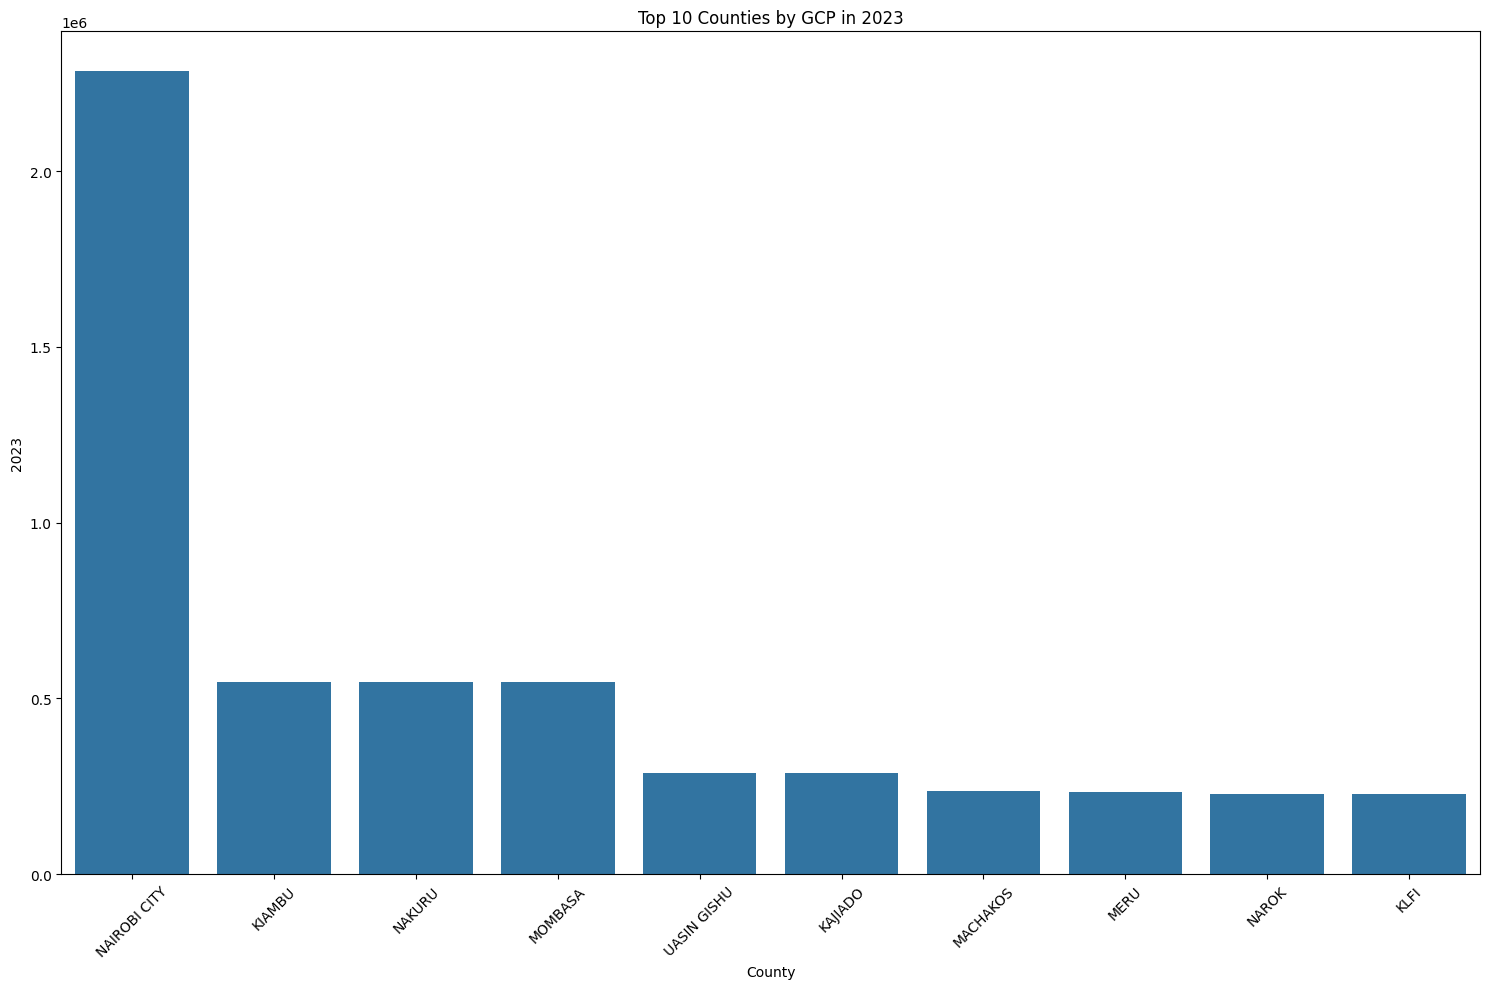

<Figure size 1500x1000 with 0 Axes>

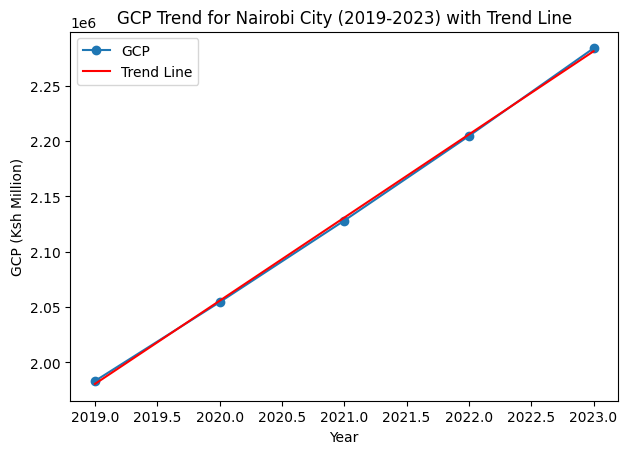

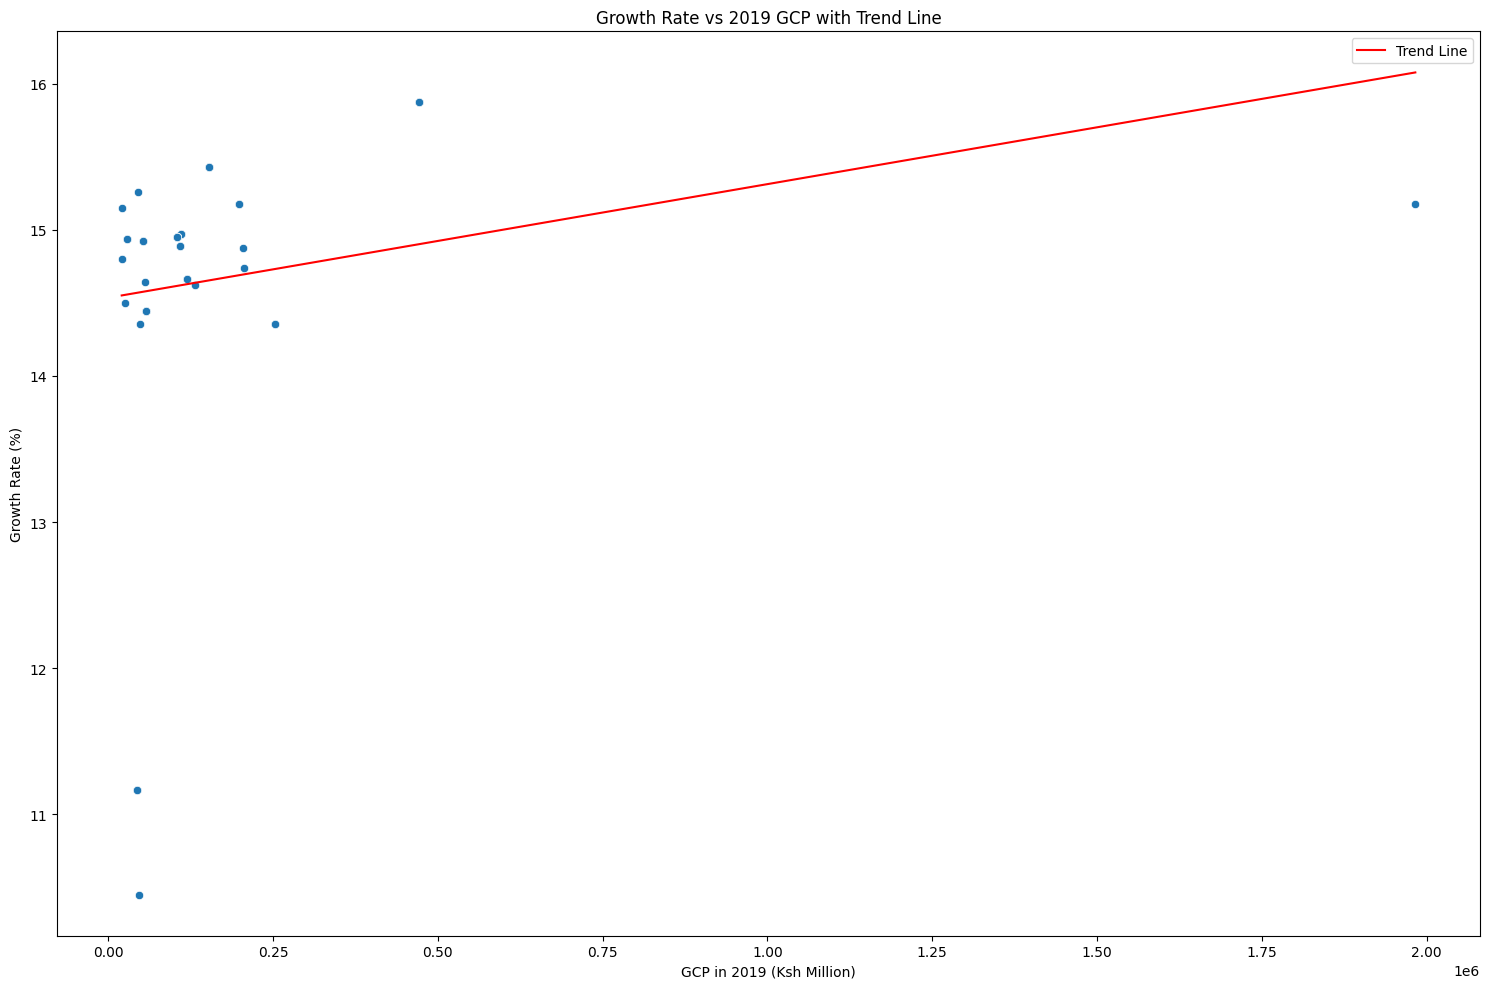

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the data from the images
data_2019_2023 = {
    'County': ['MOMBASA', 'KWALE', 'KLFI', 'TANARIVER', 'LAMU', 'TAITA TAVETA', 'GARISSA', 'WAJIR', 'MANDERA', 'MARSABIT', 'ISIOLO', 'MERU', 'THARAKA', 'EMBU', 'KITUI', 'MACHAKOS', 'MAKUENI', 'NYANDARUA', 'NYERI', 'KIRINYAGA', 'MURANG\'A', 'KIAMBU', 'TURKANA', 'WEST POKOT', 'SAMBURU', 'TRANS NZOIA', 'UASIN GISHU', 'ELGEYO MARAKWET', 'NANDI', 'BARINGO', 'LAIKIPIA', 'NAKURU', 'NAROK', 'KAJIADO', 'KERCHO', 'BOMET', 'KAKAMEGA', 'VIHIGA', 'BUNGOMA', 'BUSIA', 'SIAYA', 'KISUMU', 'HOMA BAY', 'MIGORI', 'KISII', 'NYAMIRA', 'NAIROBI CITY'],
    '2019': [471403, 109404, 198300, 27727, 20219, 52048, 45034, 46284, 43049, 25631, 20369, 203647, 56004, 153084, 119424, 205346, 109770, 109770, 119424, 109770, 131728, 471403, 52048, 56847, 27727, 109404, 252381, 104104, 104104, 43049, 47847, 471403, 198300, 252381, 153084, 119424, 153084, 56847, 104104, 56847, 56847, 104104, 104104, 104104, 104104, 56847, 1983000],
    '2020': [489019, 113280, 205430, 28712, 20947, 53884, 46707, 47441, 44196, 26512, 21083, 210839, 57964, 158707, 123600, 212513, 113662, 113662, 123600, 113662, 136270, 489019, 53884, 58794, 28712, 113280, 260955, 107787, 107787, 44196, 49482, 489019, 205430, 260955, 158707, 123600, 158707, 58794, 107787, 58794, 58794, 107787, 107787, 107787, 107787, 58794, 2054300],
    '2021': [507345, 117280, 212810, 29730, 21700, 55789, 48378, 48633, 45379, 27424, 21823, 218284, 59983, 164516, 127913, 219941, 117695, 117695, 127913, 117695, 141000, 507345, 55789, 60808, 29730, 117280, 269843, 111608, 111608, 45379, 51169, 507345, 212810, 269843, 164516, 127913, 164516, 60808, 111608, 60808, 60808, 111608, 111608, 111608, 111608, 60808, 2128100],
    '2022': [526409, 121416, 220462, 30782, 22478, 57765, 50111, 49859, 46598, 28369, 22589, 225985, 62062, 170512, 132354, 227639, 121874, 121874, 132354, 121874, 145910, 526409, 57765, 62896, 30782, 121416, 279057, 115567, 115567, 46598, 52914, 526409, 220462, 279057, 170512, 132354, 170512, 62896, 115567, 62896, 62896, 115567, 115567, 115567, 115567, 62896, 2204620],
    '2023': [546233, 125692, 228395, 31869, 23282, 59816, 51906, 51121, 47856, 29347, 23383, 233944, 64204, 176702, 136935, 235609, 126205, 126205, 136935, 126205, 150986, 546233, 59816, 65059, 31869, 125692, 288619, 119667, 119667, 47856, 54716, 546233, 228395, 288619, 176702, 136935, 176702, 65059, 119667, 65059, 65059, 119667, 119667, 119667, 119667, 65059, 2283950]
}

# Create DataFrame
df = pd.DataFrame(data_2019_2023)

# Calculate the growth rate from 2019 to 2023
df['Growth_Rate'] = (df['2023'] - df['2019']) / df['2019'] * 100

# Find the county with the highest growth rate
highest_growth = df.loc[df['Growth_Rate'].idxmax()]

# Find the county with the lowest growth rate
lowest_growth = df.loc[df['Growth_Rate'].idxmin()]

# Display summary
print("Summary of Analysis:")
print(f"County with highest growth rate: {highest_growth['County']} with a growth rate of {highest_growth['Growth_Rate']:.2f}%")
print(f"County with lowest growth rate: {lowest_growth['County']} with a growth rate of {lowest_growth['Growth_Rate']:.2f}%")

# Display the first few rows of the dataframe for reference
print("\nFirst few rows of the data:")
print(df.head())

# Data Visualization

# 1. Bar plot for GCP in 2023 for top 10 counties
plt.figure(figsize=(15, 10))
sns.barplot(x='County', y='2023', data=df.sort_values('2023', ascending=False).head(10))
plt.title('Top 10 Counties by GCP in 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line plot showing the trend of GCP over the years for Nairobi City with trend line
plt.figure(figsize=(15, 10))
nairobi_data = df[df['County'] == 'NAIROBI CITY'].iloc[:, 1:-1].T
nairobi_data.columns = ['GCP']
nairobi_data.index = nairobi_data.index.astype(int)  # Convert index to integer for regression

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(nairobi_data.index, nairobi_data['GCP'])

# Plot the data
nairobi_data.plot(kind='line', marker='o', label='Actual Data')

# Plot the trend line
plt.plot(nairobi_data.index, intercept + slope*nairobi_data.index, 'r', label='Trend Line')

plt.title('GCP Trend for Nairobi City (2019-2023) with Trend Line')
plt.xlabel('Year')
plt.ylabel('GCP (Ksh Million)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Scatter plot of Growth Rate vs 2019 GCP with trend line
plt.figure(figsize=(15, 10))
sns.scatterplot(x='2019', y='Growth_Rate', data=df)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['2019'], df['Growth_Rate'])

# Plot the trend line
x_range = np.array([df['2019'].min(), df['2019'].max()])
plt.plot(x_range, intercept + slope*x_range, 'r', label='Trend Line')

plt.title('Growth Rate vs 2019 GCP with Trend Line')
plt.xlabel('GCP in 2019 (Ksh Million)')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()